# TD n°2 : données de trafic

code : Alexandre Jayol & Mathis Boukhellouf, doctorants au LICIT-Éco7

adapté d'un énoncé de Nicolas Chiabaut (Citec, ex-LICIT) inspiré de Christine Buisson (LICIT-Éco7)

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [54]:
## Considérations cosmétiques
plt.rcParams['figure.dpi'] = 175

Dans la case du dessous, la variable ``Q3`` est un *dataframe* contenant (à compléter). Les deux dernières lignes permettent de "nettoyer" ce tableau de données : le format des dates est ``heure:minute``, et on a donné un nom explicite à la colonne collectant les dates.

Exécutez cette case, puis celle d'après, pour voir quelle tête a ce tableau de données.

bla bla
Les unités des variables stockées dans les *dataframes* sont :
- pour le débit : véh/h
- pour la vitesse : km/h
- les taux d'occupation sont exprimés en pourcentages.

In [141]:
Boucle_1_jeudi = pd.read_csv('Boucle_1_jeudi.csv', header = 0, sep = ";")
Boucle_2_jeudi = pd.read_csv('Boucle_2_jeudi.csv', header = 0, sep = ";")
Boucle_3_jeudi = pd.read_csv('Boucle_3_jeudi.csv', header = 0, sep = ";")
Boucle_1_vendredi = pd.read_csv('Boucle_1_vendredi.csv', header = 0, sep = ";")
Boucle_2_vendredi = pd.read_csv('Boucle_2_vendredi.csv', header = 0, sep = ";")
Boucle_3_vendredi = pd.read_csv('Boucle_3_vendredi.csv', header = 0, sep = ";")

# Cette boucle sert à convertir le format des heures
for numéro in ['1', '2', '3']:
    for jour in ['jeudi', 'vendredi']:
        nom_dataframe = globals()['Boucle_' + numéro + '_' + jour]
        nom_dataframe['Heure'] = pd.to_datetime(nom_dataframe['Heure'], format = "%H:%M")
        nom_dataframe.set_index('Heure')

# Les données sont récoltées toutes les minutes, la référence temporelle est la même pour tous les dataframes. On prend donc par défaut la liste des temps du premier dataframe comme liste de référence
Temps = Boucle_1_jeudi['Heure'] 

## Impact de la période d'agrégation

**Q3** : Tracez les chroniques sur le même graphique pour les différentes périodes d’agrégation de la boucle 1 et commentez.

La case du dessous va vous permettre de tracer les chroniques du débit. Pour ce faire, vous allez choisir plusieurs valeurs de périodes d'agrégation temporelle, c'est-à-dire le temps sur lequel on moyenne les données agrégées pendant cette période de temps. 
Les données sont récoltées toutes les minutes, la période minimale d'agrégation est donc d'une minute.

Dans cette case :
- pour la 1ère ligne, choisissez une valeur de période d'agrégation en minute(s) et affectez-la à ``période_agreg`` ;
- la 2ème ligne permet de tracer la chronique du débit pour cette valeur, il n'y a rien à modifier ;
- copiez les deux lignes et collez-les à la suite, puis changez la valeur de la période d'agrégation ;
- recommencez pour avoir à peu près cinq valeurs différentes.

Exécutez la case et répondez à **Q3**.

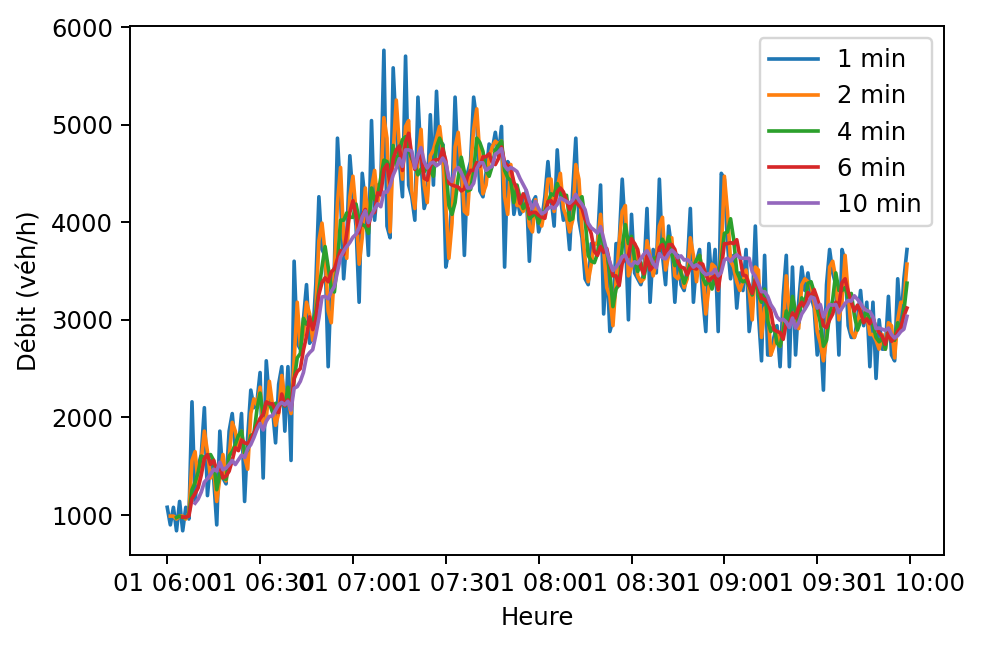

In [57]:
période_agreg = 1
plt.plot(Temps, Boucle_1_jeudi.Debit.rolling(période_agreg).mean(), label = f'{période_agreg} min')
période_agreg = 2
plt.plot(Temps, Boucle_1_jeudi.Debit.rolling(période_agreg).mean(), label = f'{période_agreg} min')
période_agreg = 4
plt.plot(Temps, Boucle_1_jeudi.Debit.rolling(période_agreg).mean(), label = f'{période_agreg} min')
période_agreg = 6
plt.plot(Temps, Boucle_1_jeudi.Debit.rolling(période_agreg).mean(), label = f'{période_agreg} min')
période_agreg = 10
plt.plot(Temps, Boucle_1_jeudi.Debit.rolling(période_agreg).mean(), label = f'{période_agreg} min')

plt.xlabel('Heure')
plt.ylabel('Débit (véh/h)')
plt.legend()

## Chroniques des variables caractéristiques

**Q4** : Tracez les chroniques du débit, de la vitesse et du taux d’occupation de chacune des boucles pour le vendredi. Identifiez différentes phases et commentez l’évolution des variables. Mesurez la durée de la congestion et la vitesse moyenne.

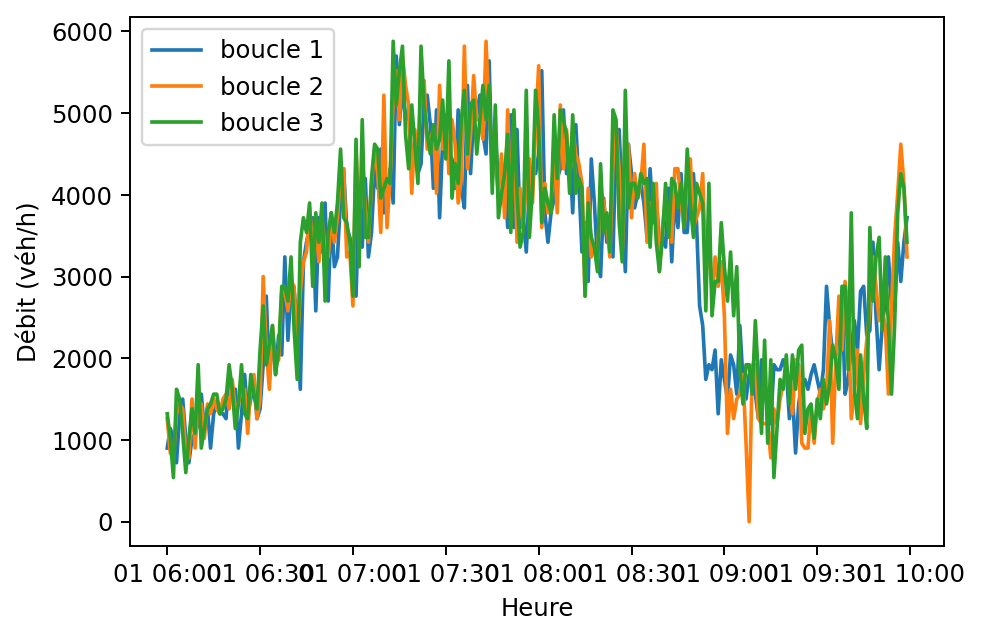

In [58]:
# Débit
plt.plot(Temps, Boucle_1_vendredi['Debit'], label = 'boucle 1')
plt.plot(Temps, Boucle_2_vendredi['Debit'], label = 'boucle 2')
plt.plot(Temps, Boucle_3_vendredi['Debit'], label = 'boucle 3')

plt.xlabel('Heure')
plt.ylabel('Débit (véh/h)')
plt.legend()

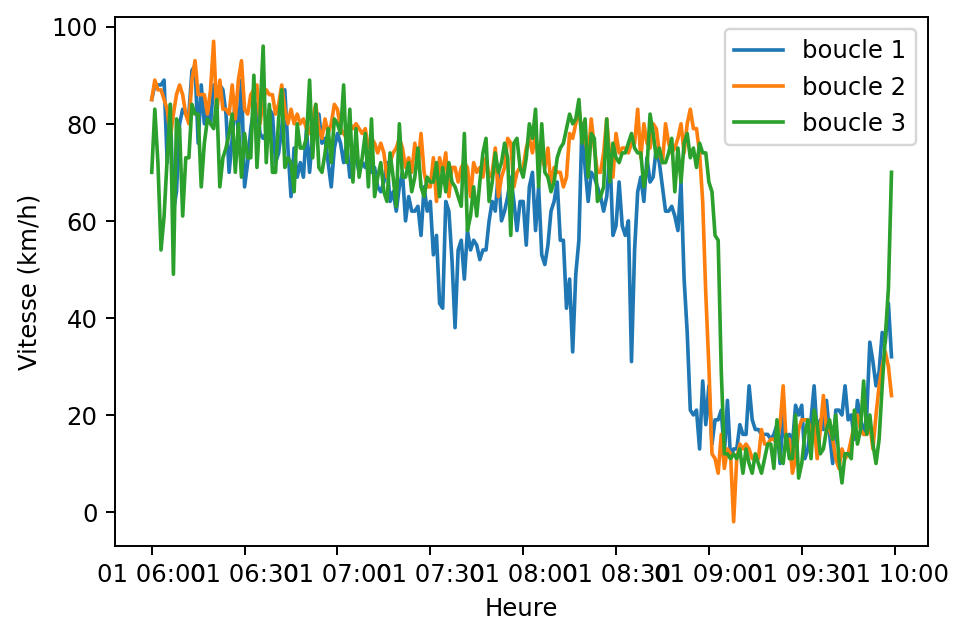

In [142]:
# Vitesse
plt.plot(Temps, Boucle_1_vendredi['Vitesse'], label = 'boucle 1')
plt.plot(Temps, Boucle_2_vendredi['Vitesse'], label = 'boucle 2')
plt.plot(Temps, Boucle_3_vendredi['Vitesse'], label = 'boucle 3')

plt.xlabel('Heure')
plt.ylabel('Vitesse (km/h)')
plt.legend()

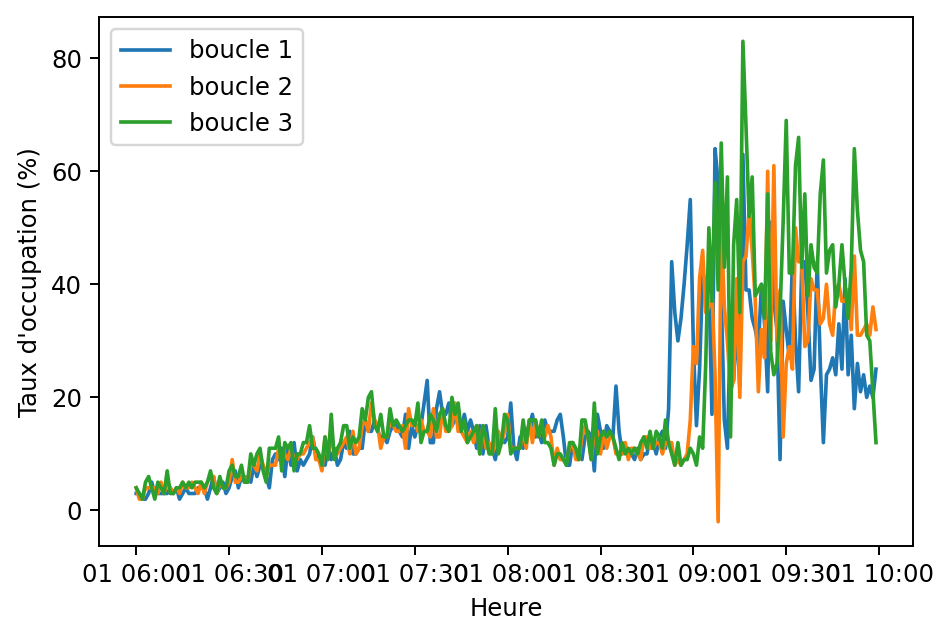

In [62]:
# Taux d'occupation
plt.plot(Temps, Boucle_1_vendredi['TauxOccupation'], label = 'boucle 1')
plt.plot(Temps, Boucle_2_vendredi['TauxOccupation'], label = 'boucle 2')
plt.plot(Temps, Boucle_3_vendredi['TauxOccupation'], label = 'boucle 3')

plt.xlabel('Heure')
plt.ylabel("Taux d'occupation (%)")
plt.legend()

**Q5** : Reprenez **Q4** pour le jeudi. Comparez avec les chroniques du vendredi.

In [ ]:
# Débit
plt.plot(Temps, Boucle_1_jeudi['Debit'], label = 'boucle 1')
plt.plot(Temps, Boucle_2_jeudi['Debit'], label = 'boucle 2')
plt.plot(Temps, Boucle_3_jeudi['Debit'], label = 'boucle 3')

plt.xlabel('Heure')
plt.ylabel('Débit (véh/h)')
plt.legend()

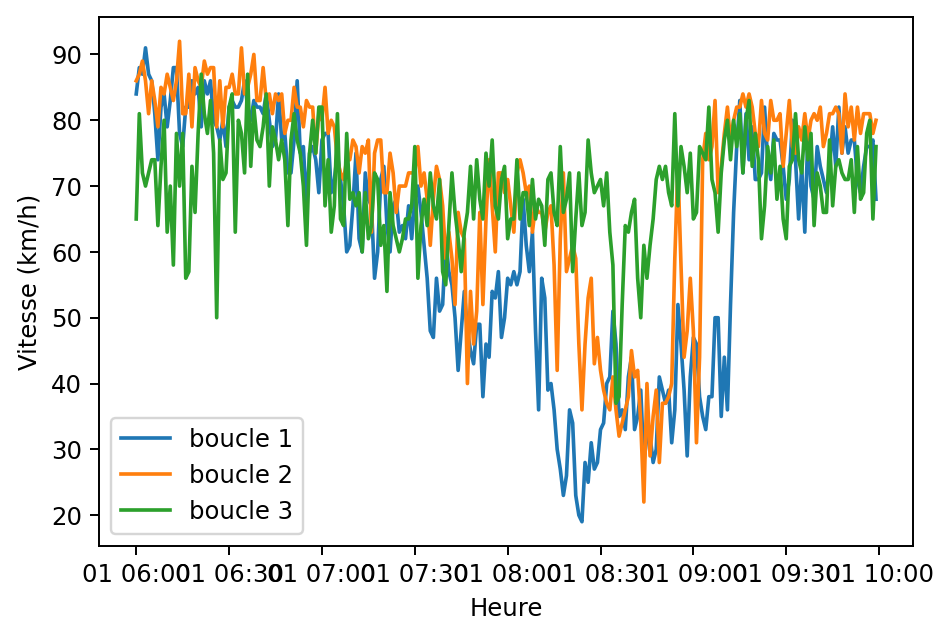

In [63]:
# Vitesse
plt.plot(Temps, Boucle_1_jeudi['Vitesse'], label = 'boucle 1')
plt.plot(Temps, Boucle_2_jeudi['Vitesse'], label = 'boucle 2')
plt.plot(Temps, Boucle_3_jeudi['Vitesse'], label = 'boucle 3')

plt.xlabel('Heure')
plt.ylabel('Vitesse (km/h)')
plt.legend()

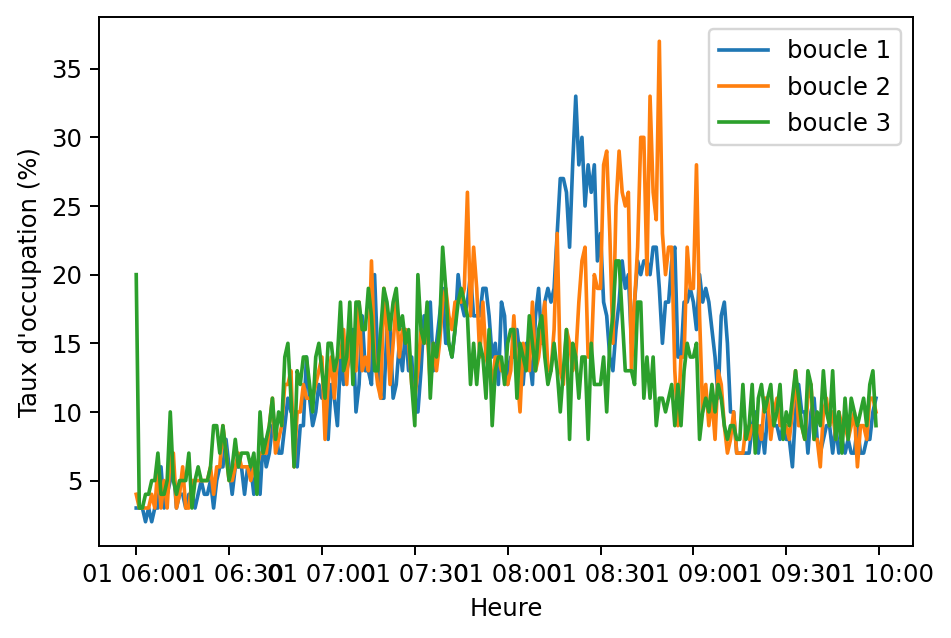

In [64]:
# Taux d'occupation
plt.plot(Temps, Boucle_1_jeudi['TauxOccupation'], label = 'boucle 1')
plt.plot(Temps, Boucle_2_jeudi['TauxOccupation'], label = 'boucle 2')
plt.plot(Temps, Boucle_3_jeudi['TauxOccupation'], label = 'boucle 3')

plt.xlabel('Heure')
plt.ylabel("Taux d'occupation (%)")
plt.legend()

## Utilisation des courbes de véhicules cumulés

**Q6** : Construisez et tracez les CVC pour chacune des boucles.

Les CVC s'obtiennent par le cumul des comptages des véhicules qui passent, ce qui est fait dans le code du dessous. 

Pour y arriver, pourquoi utilise-t-on le cumul des débits et le divise-t-on ensuite par 60 ?

In [148]:
Boucle_1_vendredi['VehiculesCumules'] = Boucle_1_vendredi['Debit'].cumsum()/60
Boucle_2_vendredi['VehiculesCumules'] = Boucle_2_vendredi['Debit'].cumsum()/60
Boucle_3_vendredi['VehiculesCumules'] = Boucle_3_vendredi['Debit'].cumsum()/60

Il reste à tracer les CVC :

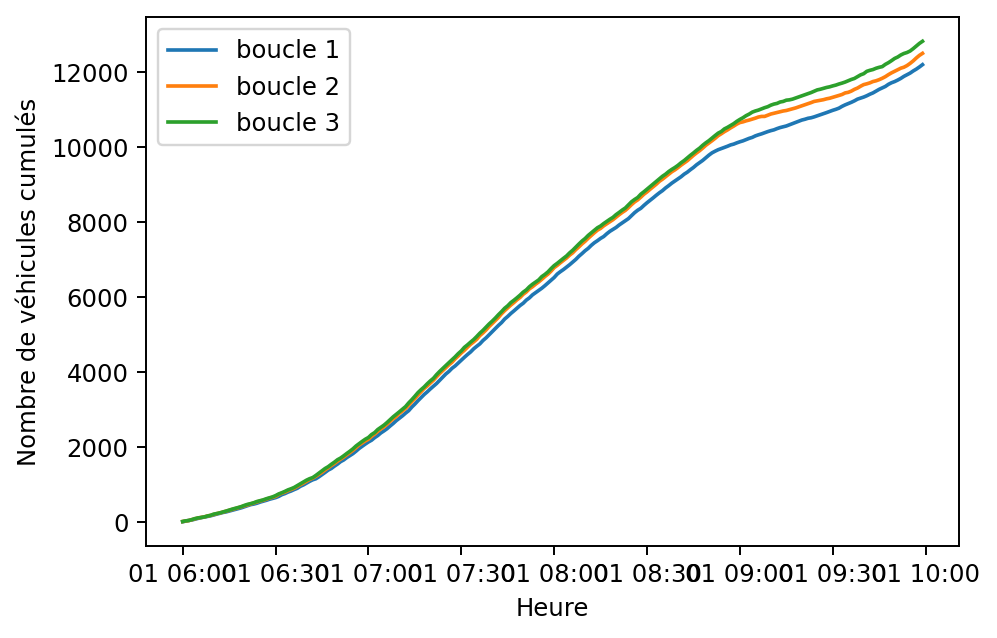

In [149]:
plt.plot(Temps, Boucle_1_vendredi['VehiculesCumules'], label = 'boucle 1')
plt.plot(Temps, Boucle_2_vendredi['VehiculesCumules'], label = 'boucle 2')
plt.plot(Temps, Boucle_3_vendredi['VehiculesCumules'], label = 'boucle 3')

plt.xlabel('Heure')
plt.ylabel('Nombre de véhicules cumulés')
plt.legend()

**Q7** : Tracez les CVC obliques et identifiez les différentes phases de fonctionnement. Les chroniques des vitesses aux différentes boucles peuvent vous aider à comprendre ce qui s’est passé. Donnez les valeurs moyennes de débits pour les différentes phases identifiées.

Si $N$ est le nombre de véhicules cumulés, dont la courbe représentative est donnée par une CVC, les CVC obliques (CVCO) sont la représentation graphique de $t \mapsto N(t) - \lambda_0 t$, où $\lambda_0$ est une valeur de débit à choisir. En général, on choisit $\lambda_0$ de sorte qu'il soit proche de la valeur du débit moyen observé en situation fluide. On retranche alors aux CVC la tendance globale du trafic : des valeurs positives (resp. négatives) sur la CVCO indiquent donc une congestion (resp. une fluidité plus prononcée).

En lisant les CVC précédentes, estimez cette valeur moyenne et reportez-la, ci-dessous, dans la variable ``Debit_moy``. **Attention :** cette valeur est en véh/min et pas en véh/h.

In [150]:
# Définition du débit moyen (veh/min)
Debit_moy = 30

# En conséquence, on construit un dataframe contenant le nombre de véhicules cumulés liés à cette valeur de débit moyen
Tendance = pd.Series(range(Debit_moy, Debit_moy*(len(Temps)+1), Debit_moy)).to_frame()
Tendance = Tendance.rename(columns={Tendance.columns[0]: 'VehiculesCumules'})

In [151]:
Boucle_1_vendredi['Obliques'] = Boucle_1_vendredi['VehiculesCumules'] - Tendance['VehiculesCumules']
Boucle_2_vendredi['Obliques'] = Boucle_2_vendredi['VehiculesCumules'] - Tendance['VehiculesCumules']
Boucle_3_vendredi['Obliques'] = Boucle_3_vendredi['VehiculesCumules'] - Tendance['VehiculesCumules']

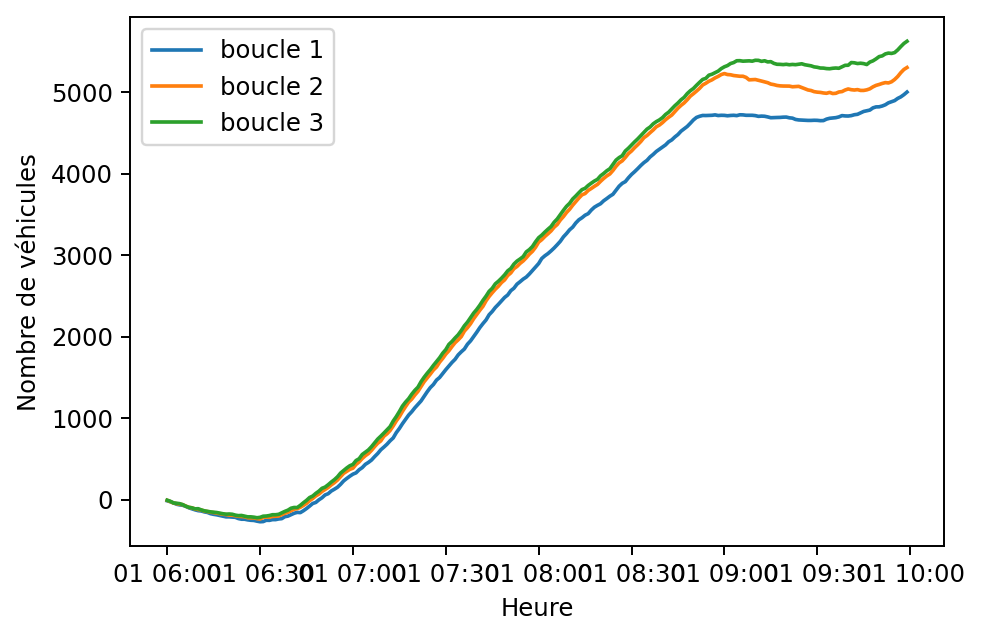

In [152]:
plt.plot(Temps, Boucle_1_vendredi['Obliques'], label = 'boucle 1')
plt.plot(Temps, Boucle_2_vendredi['Obliques'], label = 'boucle 2')
plt.plot(Temps, Boucle_3_vendredi['Obliques'], label = 'boucle 3')

plt.xlabel('Heure')
plt.ylabel('Nombre de véhicules')
plt.legend()

**Q8** : Identifiez les instants de passage de la remontée de la congestion aux différentes boucles, toujours le vendredi. Calculez la vitesse de remontée de la congestion.

Pour ce faire, reprenez les figures tracées en **Q4** pour observer, à peu près, ces instants de passage. Ensuite, affinez ces observations 

Estimez la vitesse de remontée de congestion $w$ à partir de vos observations. N'oubliez pas que les distances entre les boucles sont sur la figure 1 de l'énoncé.

## Diagramme fondamental et relation débit-vitesse

**Q9** : Tracez les diagrammes fondamentaux (relation $q = Q(k)$) ainsi que la relation $v = V(q)$ pour les boucles 1 et 2. Identifiez les zones fluides et congestionnées.

Ci-dessous, on importe le *dataframe* permettant de faire ces tracés. Avec tout ce que vous avez vu défiler depuis le début du TD, vous devriez être capables d'écrire un code qui fasse les tracés.
Petite précision : on parle ici de nuages de points, c'est donc un ``scatter`` qu'il faudra faire, et pas un ``plot``.

In [ ]:
Q9 = pd.read_csv(Chemin + "Q9.csv", header=0, sep=";")

In [ ]:
### à vous de jouer !

En réalité, on n'a pas vraiment tracé le diagramme fondamental. Pourquoi ?